In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import pybiomart
import scvi
import torch
import random
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def PlotUMAP(adata, markers, layer='log2_counts_scvi', size=2, vmin='p0', vmax='p99'):
    for i in range(len(markers)):
        sc.pl.umap(adata,
                  color=markers[i],
                  layer=layer,
                  size=size,
                  cmap=sns.blend_palette(['lightgray', sns.xkcd_rgb['red orange']], as_cmap=True),
                   vmin=vmin, vmax=vmax)

In [3]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/231228_uzquiano_d23_rna_scvi.h5ad')
adata

AnnData object with n_obs × n_vars = 29736 × 20589
    obs: 'CellID', 'SampleID', 'donor_id', 'nGene', 'nUMI', 'sex', 'library_preparation_protocol__ontology_label', 'biosample_type', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scvi'
    var: 'Genes', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_scvi_colors', 'neighbors_scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    layers: 'counts', 'counts_scvi'
    obsp: 'neighbors_scvi_connectivities', 'neighbors_scvi_distances'

In [4]:
adata.layers['log2_counts'] = sc.pp.log1p(adata.layers['counts'].copy(), base=2)
adata.layers['log2_counts_scvi'] = sc.pp.log1p(adata.layers['counts_scvi'].copy(), base=2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


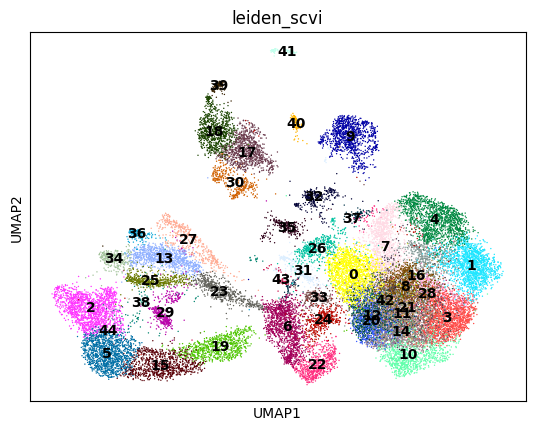

In [5]:
sc.pl.umap(adata, color=['leiden_scvi'], legend_loc='on data')

In [6]:
adata.obs

,CellID,SampleID,donor_id,nGene,nUMI,sex,library_preparation_protocol__ontology_label,biosample_type,n_genes,_scvi_batch,_scvi_labels,leiden_scvi
0,1_AAACGAACACGTGAGA-1_1_23d,Org1,Mito 210 c1 b1,536,3724,male,10X sequencing,DerivedType_Organoid,536,0,0,35
1,1_AAACGAAGTCGAAACG-1_1_23d,Org1,Mito 210 c1 b1,2310,9184,male,10X sequencing,DerivedType_Organoid,2310,0,0,14
2,1_AAACGAAGTGGCAGAT-1_1_23d,Org1,Mito 210 c1 b1,2070,6359,male,10X sequencing,DerivedType_Organoid,2068,0,0,27
3,1_AAACGAAGTGGTTCTA-1_1_23d,Org1,Mito 210 c1 b1,1292,3468,male,10X sequencing,DerivedType_Organoid,1291,0,0,23
4,1_AAACGAAGTTGGCCGT-1_1_23d,Org1,Mito 210 c1 b1,832,1809,male,10X sequencing,DerivedType_Organoid,831,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
29731,3_TTTGGTTTCGGAATGG-1_2_23d,Org6,PGP1 c1 b2,995,1825,male,10X sequencing,DerivedType_Organoid,994,5,0,15
29732,3_TTTGGTTTCGGTTAGT-1_2_23d,Org6,PGP1 c1 b2,3449,13964,male,10X sequencing,DerivedType_Organoid,3449,5,0,16
29733,3_TTTGTTGAGACCATAA-1_2_23d,Org6,PGP1 c1 b2,1382,3670,male,10X sequencing,DerivedType_Organoid,1382,5,0,8
29734,3_TTTGTTGAGAGAAGGT-1_2_23d,Org6,PGP1 c1 b2,1331,3713,male,10X sequencing,DerivedType_Organoid,1329,5,0,8


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


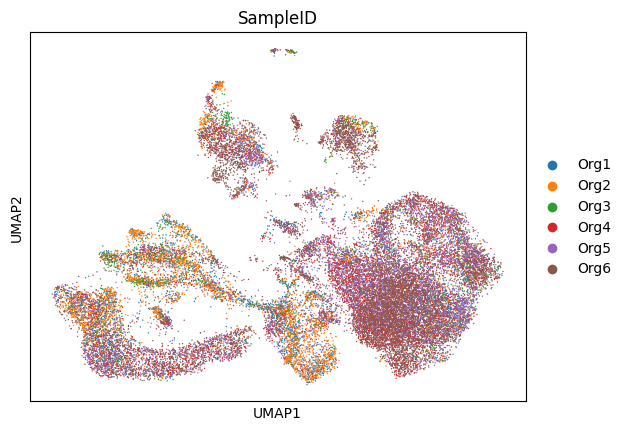

In [7]:
sc.pl.umap(adata, color=['SampleID'])

In [8]:
adata.var_names = adata.var['Genes']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Paramete

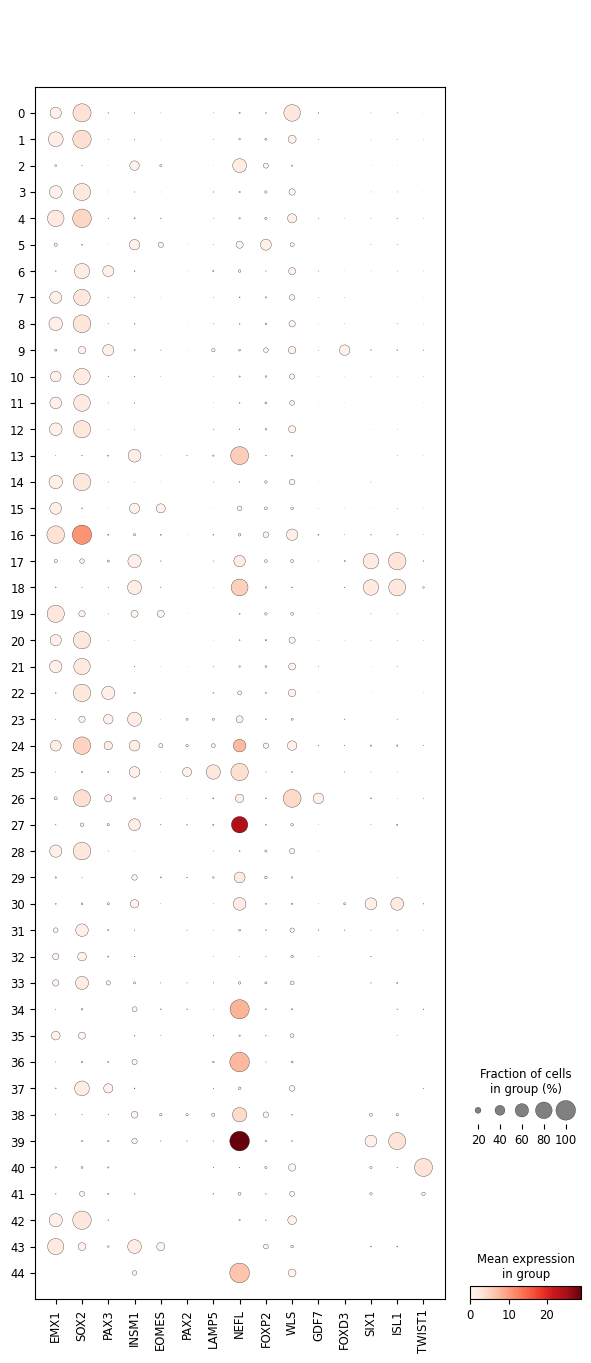

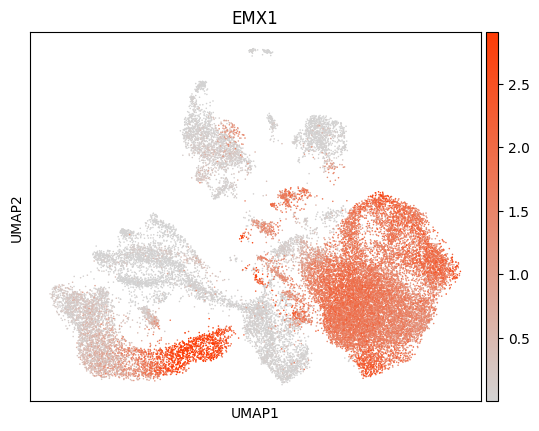

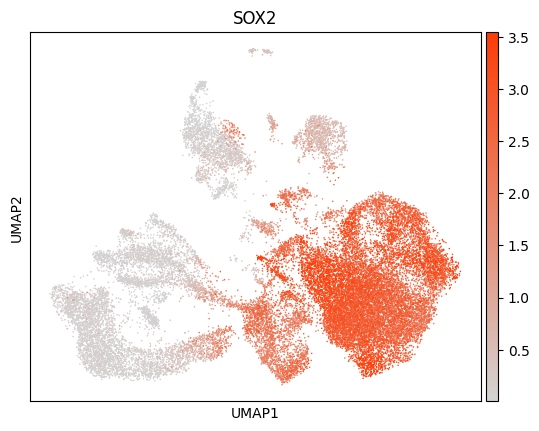

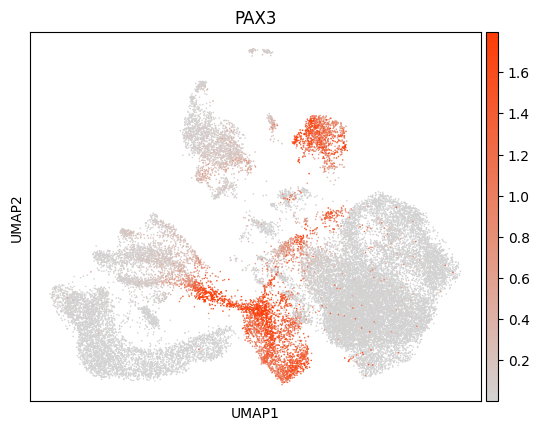

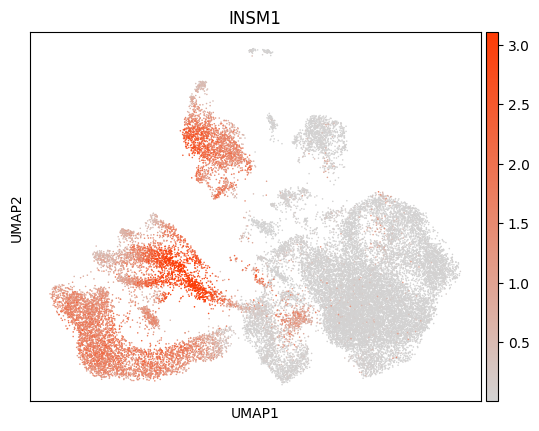

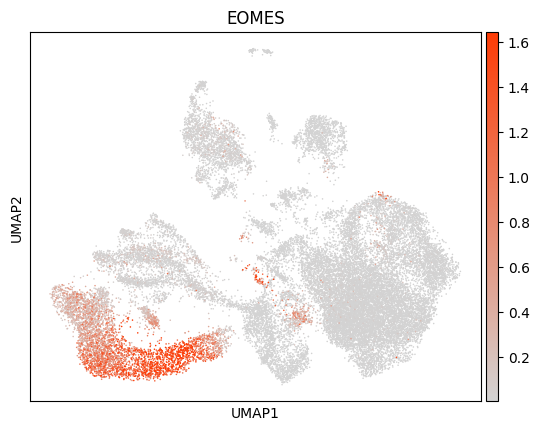

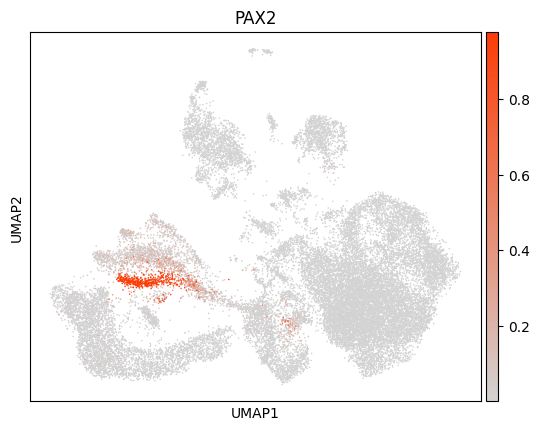

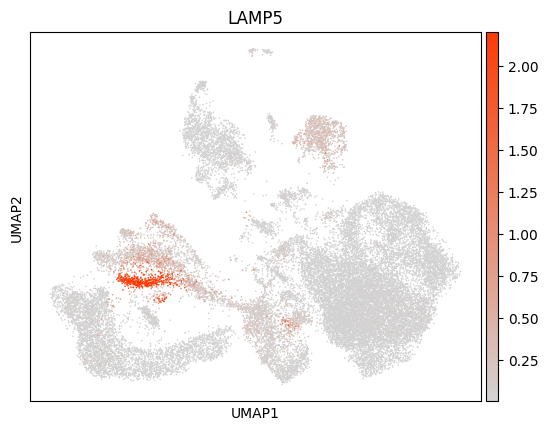

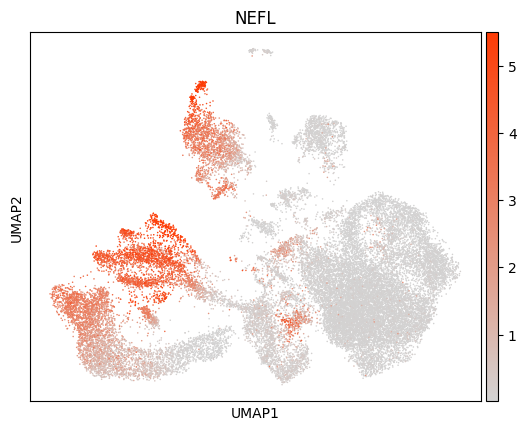

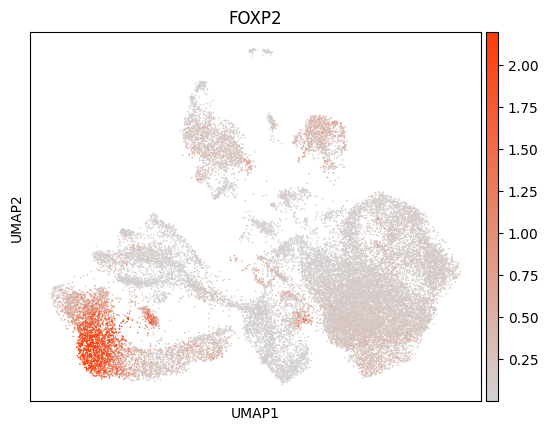

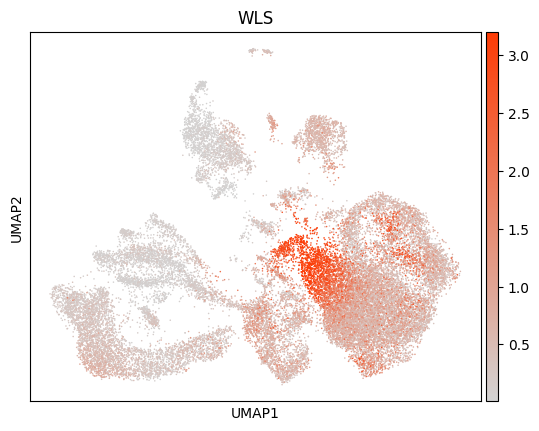

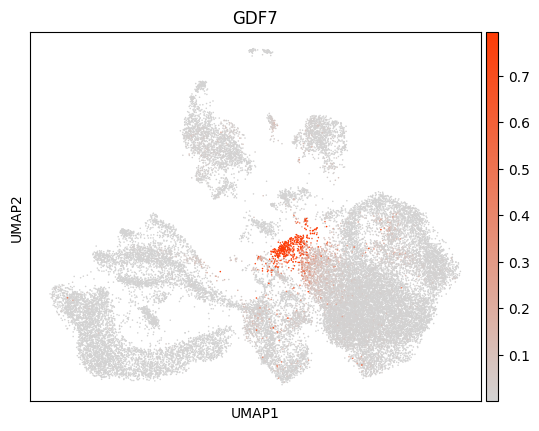

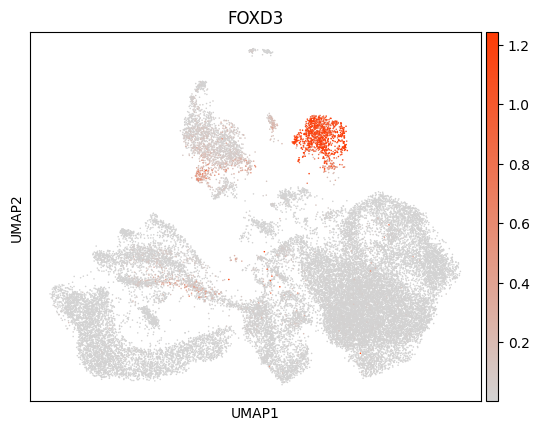

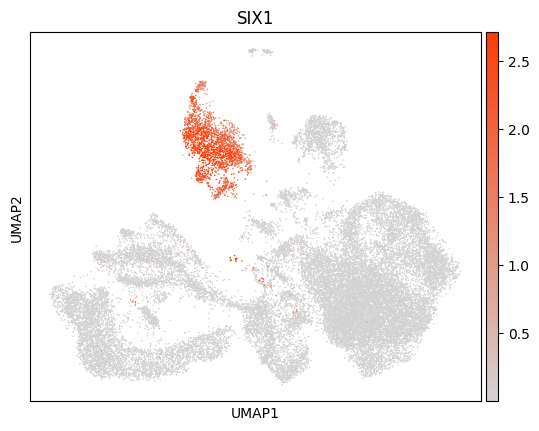

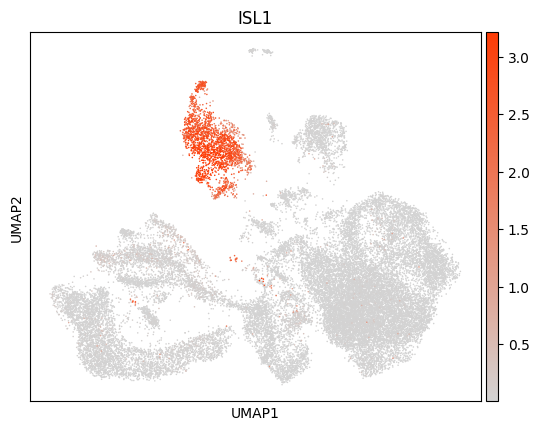

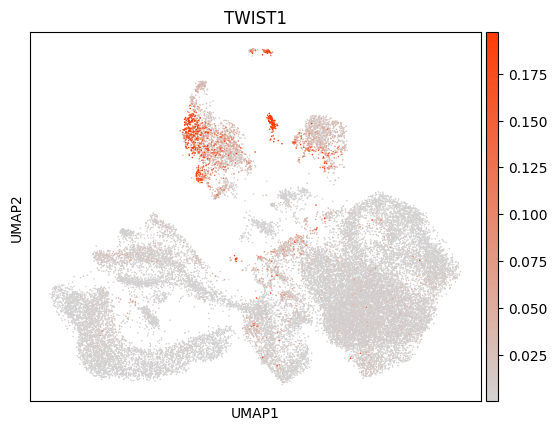

In [9]:
# Dataset1-MarkerGeneExpression.tif

markers = ['EMX1','SOX2','PAX3','INSM1','EOMES',
           'PAX2','LAMP5','NEFL','FOXP2','WLS',
           'GDF7','FOXD3','SIX1','ISL1','TWIST1']
sc.pl.dotplot(adata, markers, groupby='leiden_scvi')
PlotUMAP(adata, markers, layer='log2_counts_scvi', size=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


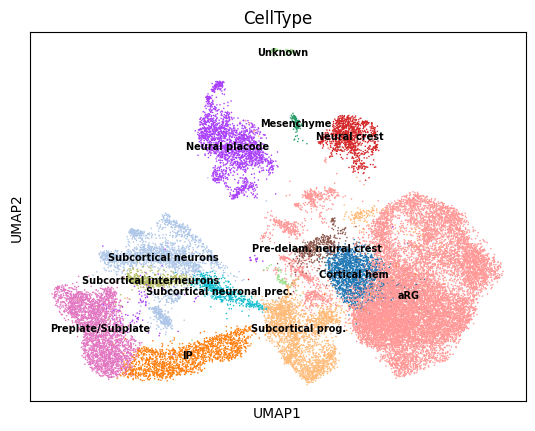

In [10]:
# aRG: 1, 3, 4, 7, 8, 10, 11, 12, 14, 16, 20, 21, 28, 31, 32, 33, 35, 42
# IP: 15, 19
# Preplate/Subplate: 2, 5, 44
# Cortical hem: 0
# Subcortical prog.: 6, 22, 24, 37
# Subcortical neuronal prec.: 23
# Subcortical neurons: 13, 27, 29, 34, 36
# Subcortical interneurons: 25
# Pre-delam. neural crest: 26
# Neural crest: 9
# Neural placode: 17, 18, 30, 38?, 39
# Mesenchyme: 40
# Unknown: 41, 43

cluster_labels = {'0':'Cortical hem',
                  '1':'aRG',
                  '2':'Preplate/Subplate',
                  '3':'aRG',
                  '4':'aRG',
                  '5':'Preplate/Subplate',
                  '6':'Subcortical prog.',
                  '7':'aRG',
                  '8':'aRG',
                  '9':'Neural crest',
                  '10':'aRG',
                  '11':'aRG',
                  '12':'aRG',
                  '13':'Subcortical neurons',
                  '14':'aRG',
                  '15':'IP',
                  '16':'aRG',
                  '17':'Neural placode',
                  '18':'Neural placode',
                  '19':'IP',
                  '20':'aRG',
                  '21':'aRG',
                  '22':'Subcortical prog.',
                  '23':'Subcortical neuronal prec.',
                  '24':'Subcortical prog.',
                  '25':'Subcortical interneurons',
                  '26':'Pre-delam. neural crest',
                  '27':'Subcortical neurons',
                  '28':'aRG',
                  '29':'Subcortical neurons',
                  '30':'Neural placode',
                  '31':'aRG',
                  '32':'aRG',
                  '33':'aRG',
                  '34':'Subcortical neurons',
                  '35':'aRG',
                  '36':'Subcortical neurons',
                  '37':'Subcortical prog.',
                  '38':'Neural placode',
                  '39':'Neural placode',
                  '40':'Mesenchyme',
                  '41':'Unknown',
                  '42':'aRG',
                  '43':'Unknown',
                  '44':'Preplate/Subplate'}
adata.obs['CellType'] = adata.obs['leiden_scvi'].map(cluster_labels)
sc.pl.umap(adata, color=['CellType'], size=5, legend_loc='on data', legend_fontsize=7)